### Explorating Databases with Big Metrics and possible insights for deep-dive analysis

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

folder = print(os.getcwd())

/home/fabiopremero/projetos/github_projects/ecommerce_analysis/notebooks


In [23]:
with open(r'../data/item_dim.csv', 'r', encoding='utf-8') as file:
    for i in range(15):
        print(file.readline())

item_key;item_name;desc;unit_price;man_country;supplier;unit

I00001;A&W Root Beer - 12 oz cans;Beverage - Soda;11,5;Netherlands;Bolsius Boxmeer;cans

I00002;A&W Root Beer Diet - 12 oz cans;Beverage - Soda;6,75;poland;CHROMADURLIN S.A.S;cans

I00003;Barq's Root Beer - 12 oz cans;Beverage - Soda;6,75;Bangladesh;DENIMACH LTD;cans

I00004;Cherry Coke 12oz;Beverage - Soda;6,75;Netherlands;Bolsius Boxmeer;cans

I00005;Cherry Coke Zero 12 pack;Beverage - Soda;6,75;Finland;HARDFORD AB;cans

I00006;Coke Classic 12 oz cans;Beverage - Soda;16,25;Lithuania;BIGSO AB;cans

I00007;Coke Classic 12 oz cans;Beverage - Soda;6,75;India;Indo Count Industries Ltd;cans

I00008;Coke Zero Sugar 12 oz cans;Beverage - Soda;16,25;India;Indo Count Industries Ltd;cans

I00009;Diet Coke - 12 oz cans;Beverage - Soda;16,25;Netherlands;Bolsius Boxmeer;cans

I00010;Diet Coke - 12 oz cans;Beverage - Soda;6,75;Lithuania;BIGSO AB;cans

I00011;Diet Coke Caffeine Free 12oz cans;Beverage - Soda;6,75;Germany;Friedola 1888 Gmb

In [24]:
# Importing all databases
df = pd.read_csv(r'../data/fact_table.csv', sep= ';', decimal=',')
df_time = pd.read_csv(r'../data/time_dim.csv')
df_item = pd.read_csv(r'../data/item_dim.csv', sep=';', encoding='latin1', decimal=',')
df_store = pd.read_csv(r'../data/store_dim.csv', sep=',')
df_trans = pd.read_csv(r'../data/Trans_dim.csv', sep=',')
df_cust = pd.read_csv(r'../data/customer_dim.csv', sep=',', encoding='latin1')

df_cust.info()
df_cust.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9191 entries, 0 to 9190
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   coustomer_key  9191 non-null   object
 1   name           9164 non-null   object
 2   contact_no     9191 non-null   int64 
 3   nid            9191 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 287.3+ KB


,coustomer_key,name,contact_no,nid
0,C000001,sumit,8801920345851,7505075708899
1,C000002,tammanne,8801817069329,1977731324842
2,C000003,kailash kumar,8801663795774,3769494056318
3,C000004,bhagwati prasad,8801533627961,9378834712725
4,C000005,ajay,8801943715786,3540815556323


In [25]:
# Ajusting df_time for the perfect DType

df_time['date'] = pd.to_datetime(df_time['date'], errors='coerce', dayfirst=False)
df_time.head()

/tmp/ipykernel_10488/1119926485.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_time['date'] = pd.to_datetime(df_time['date'], errors='coerce', dayfirst=False)


,time_key,date,hour,day,week,month,quarter,year
0,T00001,2017-05-20 14:56:00,14,20,3rd Week,5,Q2,2017
1,T00002,2015-01-30 22:14:00,22,30,4th Week,1,Q1,2015
2,T00003,2020-03-14 02:34:00,2,14,2nd Week,3,Q1,2020
3,T00004,2018-04-27 12:19:00,12,27,4th Week,4,Q2,2018
4,T00005,2018-04-14 10:43:00,10,14,2nd Week,4,Q2,2018


#### Analysing Metrics in Date Range

In [29]:
df_fact_time = df.merge(df_time,how='left')

df_fact_time = df_fact_time[(df_fact_time['date'] >= '2014-03-01') & (df_fact_time['date'] <= '2020-12-31')]

df_fact_time.head()



,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,hour,day,week,month,quarter,year
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0,2016-04-26 17:13:00,17,26,4th Week,4,Q2,2016
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0,2018-06-11 19:08:00,19,11,2nd Week,6,Q2,2018
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0,2016-11-19 08:19:00,8,19,3rd Week,11,Q4,2016
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0,2020-02-01 06:00:00,6,1,1st Week,2,Q1,2020
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0,2014-07-15 02:58:00,2,15,3rd Week,7,Q3,2014


/tmp/ipykernel_10488/2520315488.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=annual_revenue, x='year', y='total_price', palette='Blues')


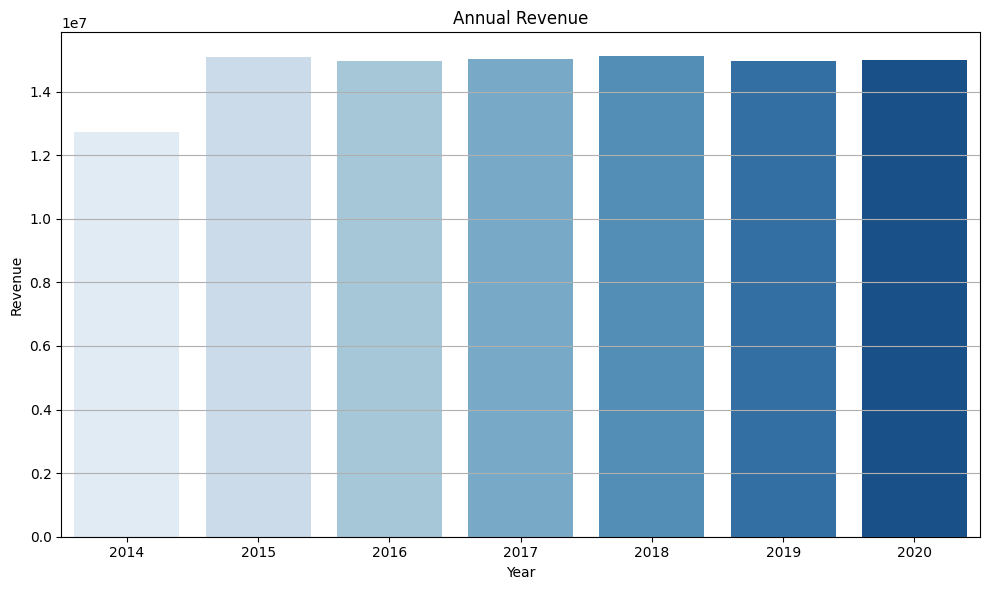

In [38]:
# Create a column for sorting and labeling
annual_revenue = df_fact_time.groupby('year')['total_price'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=annual_revenue, x='year', y='total_price', palette='Blues')

plt.title('Annual Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Top 10 Products by Total Revenue

In [43]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_key     264 non-null    object 
 1   item_name    264 non-null    object 
 2   desc         264 non-null    object 
 3   unit_price   264 non-null    float64
 4   man_country  264 non-null    object 
 5   supplier     264 non-null    object 
 6   unit         263 non-null    object 
dtypes: float64(1), object(6)
memory usage: 14.6+ KB


In [45]:
top_products = df_fact_time.groupby('item_key')['total_price'].sum().reset_index()

top_products = top_products.sort_values(by='total_price', ascending=False)
top_10_products = top_products.head(10)

top_10_products = top_10_products.merge(df_item, on='item_key',how='left')

/tmp/ipykernel_10488/1903427541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products, x='total_price', y='item_name', palette='viridis')
/tmp/ipykernel_10488/1903427541.py:8: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/fabiopremero/projetos/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


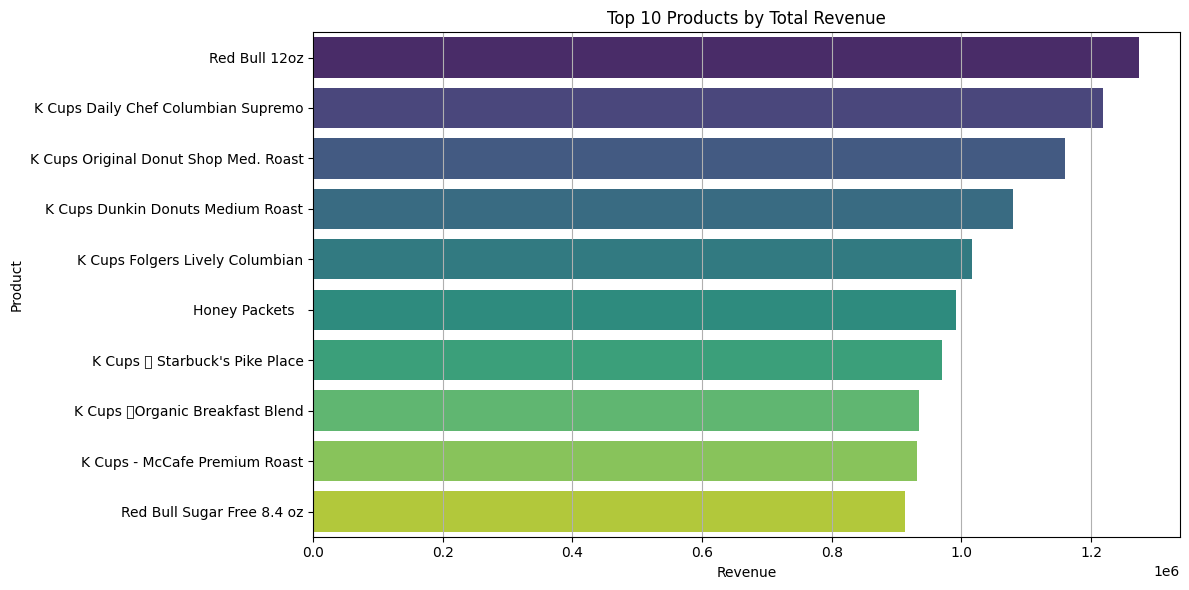

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, x='total_price', y='item_name', palette='viridis')

plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.grid(axis='x')
plt.tight_layout()
plt.show()
